# Visualisation

In [1]:
import os
import glob
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import pandas as pd
import datetime
from gensim.models import Word2Vec

D:\Outil\Anaconda\envs\majeure-ml-env\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
now = str(datetime.datetime.now()).replace(" ","")

In [3]:
glob.glob('./model/*')

['./model\\2019-02-2116-32-11-101470.model',
 './model\\2019-02-2116-41-38-689341.model',
 './model\\2019-02-2116-58-58-611425.model',
 './model\\2019-02-2117-04-42-798523.model',
 './model\\2019-02-2117-05-54-119339.model',
 './model\\2019-02-2117-14-38-361318.model',
 './model\\2019-02-2117-24-13-687530.model']

In [4]:
list_of_files = glob.glob('./model/*') # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
model = Word2Vec.load(latest_file)

In [5]:
vocab = list(model.wv.vocab)
X = model[vocab]

D:\Outil\Anaconda\envs\majeure-ml-env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [6]:
tsne = manifold.TSNE(n_components=2, random_state=0, n_iter=500, perplexity=5, init='pca')
low_dim_embs  = tsne.fit_transform(X)

In [7]:
df = pd.DataFrame(low_dim_embs , index=vocab, columns=['x', 'y'])

In [8]:
df.to_csv(now.replace(":","").replace(".","") + ".csv")

In [13]:
import matplotlib.pyplot as plt

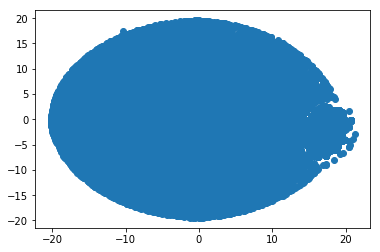

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

In [ ]:
for word, pos in df.iterrows():
    ax.annotate(word, pos)